In [4]:
!pip install wordcloud matplotlib pillow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 12.8 MB/s eta 0:00:0000:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [35]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(data, save_file_name):
    # If the input is a DataFrame, extract the 'stripped' column
    if isinstance(data, pd.DataFrame):
        if 'stripped' not in data.columns:
            raise KeyError("'stripped' column not found in the DataFrame")
        text_series = data['stripped'].astype(str)
    
    # If the input is already a Series, proceed directly
    elif isinstance(data, pd.Series):
        text_series = data.astype(str)
    
    else:
        raise ValueError("Expected a pandas DataFrame or Series.")
    
    # Join all text from the Series into a single string
    text = ' '.join(text_series)

    # Define custom stopwords
    custom_stopwords = set(['main', 'key', 'idea'])
    stopwords = set(STOPWORDS)
    stopwords.update(custom_stopwords)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

    # Print the words in the word cloud for debugging
    print(wordcloud.words_.keys())

    # Plot and save the word cloud as a PDF
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('/s/chopin/l/grad/shadaab/Documents/NeuroDiverseDataset/word_cloud/' + save_file_name + ".pdf", 
                bbox_inches='tight', format='pdf')
    plt.show()


In [32]:
df = pd.read_csv('/s/chopin/l/grad/shadaab/Documents/NeuroDiverseDataset/NeuroDiverse/Data/topic.csv')
df.head()

,ID,Neurodiversity,summarize
0,1,Autism,The key topic is how to address an employee's ...
1,2,Autism,The main topic is considering taking time off ...
2,3,Autism,The key topic is the emotional struggle of a m...
3,4,Autism,The key topic is how to improve social interac...
4,5,Autism,The key topic is autism in the context of big ...


In [66]:
diseases = df['Neurodiversity'].unique()
diseases

array(['Autism', 'Schizophrenia', 'Bipolar', 'Anxiety', 'PTSD', 'BPD',
       'Dyslexia', 'ADHD', 'OCD', 'Depression'], dtype=object)

In [37]:
# All data
all = df['summarize']
print(type(all))
# generate_wordcloud(all, 'all-v1')

<class 'pandas.core.series.Series'>


In [64]:
def generate_wordcloud_series(data_frame, save_file_name, stp_words):

    text = ' '.join(data_frame['summarize'].astype(str))

    custom_stopwords = set(['main', 'key', 'idea', 'topic'])
    custom_stopwords.update(stp_words)
    stopwords = set(STOPWORDS)
    stopwords.update(custom_stopwords)

    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
    print(wordcloud.words_.keys())
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('/s/chopin/l/grad/shadaab/Documents/NeuroDiverseDataset/word_cloud/' + save_file_name + ".pdf", 
                bbox_inches='tight', format='pdf')
    plt.show()

In [60]:
# custom_stopwords = set(['main', 'key', 'idea', 'topic'])
# custom_stopwords.update(['adhd','anxiety'])
# print(custom_stopwords)

{'key', 'anxiety', 'topic', 'main', 'adhd', 'idea'}


dict_keys(['individual', 'medication', 'managing', 'work', 'specifically', 'struggle', 'job', 'symptoms', 'due', 'seeking', 'challenge', 'impact', 'whether', 'potential', 'workplace', 'anxiety', 'adult', 'career', 'experience', 'accommodation', 'diagnosis', 'use', 'challenges faced', 'seeking advice', 'working', 'difficulty', 'mental health', 'autism', 'Adderall', 'including', 'disclosing', 'author', 'related', 'treatment', 'manager', 'concern', 'seeking recommendations', 'alternative', 'care', 'particularly', 'taking', 'time', 'employee', 'support', 'finding', 'new', 'relationship', 'coach', 'dealing', 'feeling', 'help', 'without', 'one', 'search', 'issue', 'potential impact', 'coaching', 'productivity', 'prescription', 'effectiveness', 'process', 'someone', 'professional', 'struggling', 'lack', 'possibility', 'disability', 'diagnosed', 'ADD', 'social', 'focus', 'lawyer', 'despite', 'negative', 'personal', 'need', 'manage', 'people', 'performance', 'severe', 'depression', 'corporate',

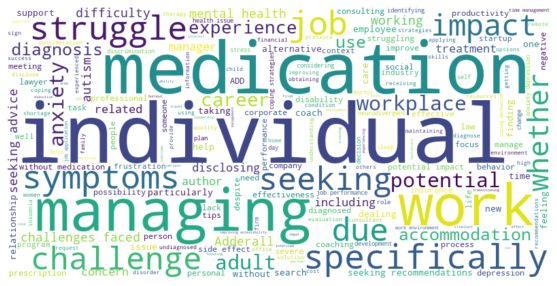

In [62]:
adhd = df[(df['Neurodiversity'] == 'ADHD')]
generate_wordcloud_series(adhd, 'adhd', ['adhd'])

dict_keys(['work', 'job', 'depression', 'mental health', 'due', 'related', 'impact', 'stress', 'individual', 'struggle', 'managing', 'dealing', 'challenge', 'social', 'whether', 'seeking', 'medication', 'experience', 'career', 'ADHD', 'workplace', 'seeking advice', 'caused', 'new', 'concern', 'potential', 'relationship', 'including', 'feeling', 'coping', 'individual struggle', 'taking', 'use', 'fear', 'finding', 'difficulty', 'role', 'working', 'negative impact', 'employee', 'work related', 'personal', 'health issues', 'job interview', 'leave', 'interview', 'management', 'issue', 'one', 'emotional', 'situation', 'manager', 'therapy', 'lack', 'support', 'specifically', 'financial', 'desire', 'new job', 'work environment', 'despite', 'company', 'severe', 'unemployment', 'author', 'experiencing', 'meeting', 'symptoms', 'home', 'person', 'causing', 'particularly', 'negative', 'position', 'possibility', 'performance', 'overcome', 'toxic', 'search', 'level', 'well', 'leaving', 'decision', 'y

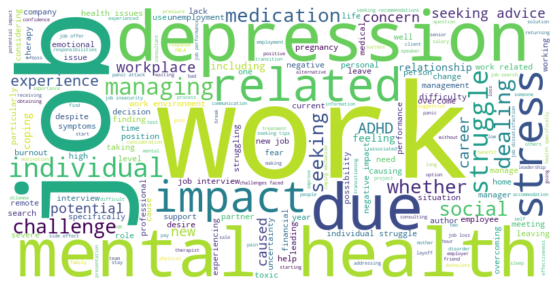

In [63]:
anxiety = df[(df['Neurodiversity'] == 'Anxiety')]
generate_wordcloud_series(anxiety, 'anxiety',['anxiety'])

dict_keys(['individual', 'ADHD', 'job', 'seeking', 'work', 'spectrum', 'accommodation', 'workplace', 'challenges faced', 'challenge', 'ASD', 'due', 'potential', 'search', 'including', 'need', 'experience', 'seeking advice', 'struggle', 'diagnosis', 'disorder', 'skill', 'mental health', 'school', 'someone', 'behavior', 'diagnosed', 'social', 'anxiety', 'working', 'person', 'child', 'impact', 'author', 'neurodiversity', 'support', 'opportunities', 'particularly', 'condition', 'neurodivergent', 'benefits', 'diagnose', 'high functioning', 'employee', 'time', 'home', 'family', 'financial', 'corporate', 'disclosing', 'difficulties', 'remote', 'community', 'finding', 'therapy', 'data', 'assistance', 'career', 'healthcare', 'adult', 'autistic', 'employment', 'BCBA', 'depression', 'faced', 'OCD', 'meet', 'new', 'addressing', 'effectiveness', 'concern', 'inclusion', 'DEI', 'recent', 'industry', 'difficulty', 'partner', 'testing', 'specifically', 'provided', 'related', 'education', 'lack', 'profe

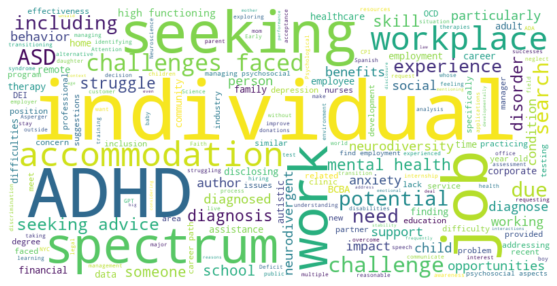

In [65]:
autism = df[(df['Neurodiversity'] == 'Autism')]
generate_wordcloud_series(autism, 'autism',['autism'])

dict_keys(['disorder', 'mental health', 'seeking', 'impact', 'job', 'dealing', 'individual', 'struggle', 'managing', 'advice', 'due', 'ADHD', 'work', 'experience', 'challenges faced', 'whether', 'challenges', 'mental', 'illness', 'issues', 'potential', 'help', 'negative', 'treatment', 'PTSD', 'diagnoses', 'depression', 'condition', 'relationship', 'someone', 'education', 'working', 'medication', 'needs', 'friend', 'use', 'ADA', 'accommodations', 'different', 'employee', 'differently', 'professional', 'new', 'disclose', 'one', 'including', 'author', 'social', 'diagnosis', 'despite', 'various', 'living', 'program', 'continue', 'diagnosed', 'Type', 'related', 'BPD', 'difficulty', 'long', 'hours', 'sleep', 'HR', 'permission', 'misuse', 'medical', 'slurs', 'jokes', 'offense', 'causes', 'parent', 'likely', 'cope', 'situation', 'current', 'desire', 'pursue', 'career', 'path', 'supply', 'chain', 'procurement', 'filing', 'legality', 'treating', 'disabilities', 'romantic', 'responsibilities', 'e

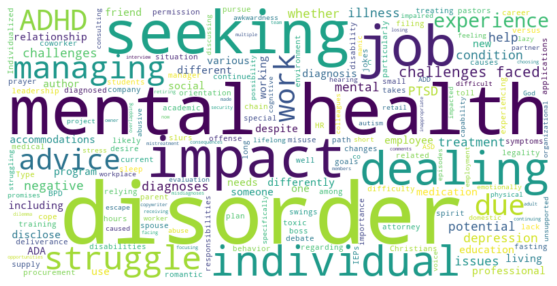

In [67]:
bipolar = df[(df['Neurodiversity'] == 'Bipolar')]
generate_wordcloud_series(bipolar, 'bipolar',['bipolar'])

dict_keys(['anxiety', 'mental health', 'job', 'struggle', 'due', 'individual', 'work', 'impact', 'challenge', 'coping', 'workplace', 'medication', 'whether', 'finding', 'potential', 'individual struggle', 'including', 'seeking', 'concern', 'dealing', 'relationship', 'struggling', 'taking', 'ADHD', 'experience', 'related', 'lack', 'career', 'feeling', 'health issues', 'difficulty', 'use', 'leave', 'personal', 'financial', 'therapy', 'issue', 'managing', 'life', 'stress', 'find', 'therapist', 'desire', 'specifically', 'caused', 'seeking advice', 'negative impact', 'employment', 'need', 'job loss', 'year', 'burnout', 'symptoms', 'search', 'employee', 'treatment', 'despite', 'author', 'support', 'new', 'performance', 'unemployment', 'emotional', 'one', 'working', 'possibility', 'well', 'manager', 'severe', 'help', 'experiencing', 'industry', 'professional', 'motivation', 'seasonal', 'self', 'speaker', 'potential impact', 'loss', 'leading', 'partner', 'medical', 'work environment', 'negativ

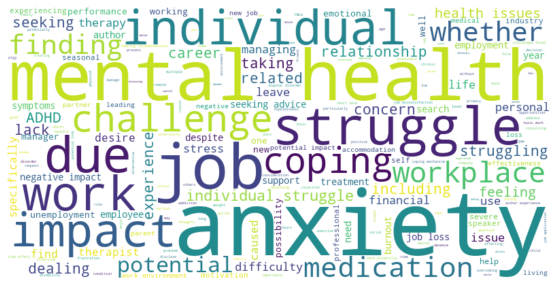

In [68]:
depression = df[(df['Neurodiversity'] == 'Depression')]
generate_wordcloud_series(depression, 'depression',['depression'])

dict_keys(['challenges', 'dealing', 'family', 'member', 'presents', 'incident', 'resident', 'falling', 'wheelchair', 'question', 'whether', 'neglect', 'occurred', 'faced', 'BCG', 'London', 'office', 'including', 'nepotism', 'recent', 'tragedy', 'leading', 'mental', 'exhaustion', 'sense', 'corporate', 'concern', 'genetic', 'risk', 'child', 'autism', 'search', 'appropriate', 'testing', 'take', 'precautions', 'development', 'groundbreaking', 'test', 'detecting', 'hallucinations', 'advance', 'treatment', 'link', 'cats'])


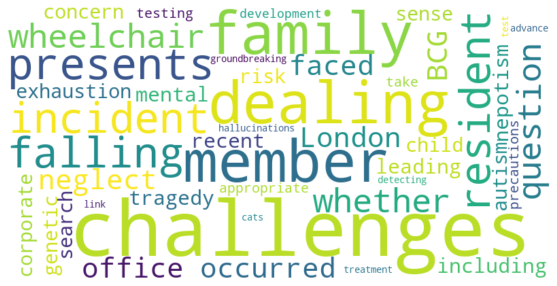

In [69]:
schizophrenia = df[(df['Neurodiversity'] == 'Schizophrenia')]
generate_wordcloud_series(schizophrenia, 'schizophrenia',['schizophrenia'])

dict_keys(['job', 'impact', 'individual', 'mental health', 'experience', 'toxic work', 'due', 'potential', 'work environment', 'workplace', 'emotional', 'abuse', 'decision', 'experiencing', 'negative', 'new', 'struggle', 'self', 'stress', 'coping', 'concern', 'hunters', 'issue', 'current', 'treatment', 'resulting', 'previous', 'whether', 'burnout', 'fear', 'seeking', 'related', 'feeling', 'life', 'author', 'manager', 'veteran', 'hiring process', 'harassment', 'anxiety', 'support', 'despite', 'health', 'toxic', 'finding', 'industry', 'partner', 'difficult', 'overcome', 'employer', 'layoff', 'leaving', 'aftermath', 'abusive', 'making', 'possibility', 'difficulty', 'frustration', 'belief', 'lies', 'interviewers', 'rather', 'offer', 'managing', 'Bipolar', 'Disorder', 'dealing', 'workload', 'well', 'need', 'triggers', 'therapy', 'employment', 'focus', 'trauma', 'challenges', 'unrealistic', 'excessive', 'requirements', 'poor', 'compensation', 'offered', 'market', 'leading', 'teacher', 'quit'

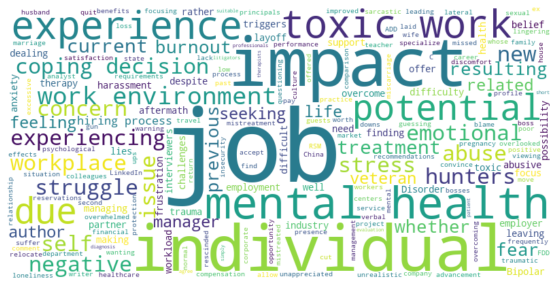

In [70]:
ptsd = df[(df['Neurodiversity'] == 'PTSD')]
generate_wordcloud_series(ptsd, 'ptsd',['ptsd'])

dict_keys(['borderline personality', 'personality disorder', 'spouse', 'dealing', 'partner', 'managing', 'mental', 'health', 'living', 'disorder', 'whether', 'improve', 'time', 'frequent', 'mood', 'swings', 'anger', 'relationship', 'bipolar', 'impact', 'seeking', 'experience', 'navigating', 'successful', 'marriage', 'potentially', 'untreated', 'considering', 'children', 'aftermath', 'hurtful', 'abusive', 'ex', 'boyfriend', 'finding', 'ways', 'move', 'without', 'reestablishing', 'contact', 'challenges', 'related', 'education', 'executive', 'dysfunction', 'ADHD', 'symptoms', 'including', 'medication', 'effective', 'alternatives', 'work', 'performance', 'lack', 'support', 'company', 'author', 'professionals', 'diagnosis', 'PTSD', 'short', 'evaluation', 'potential', 'consideration', 'physician', 'assisted', 'suicide', 'individuals', 'recommendations', 'books', 'healthy', 'gay', 'identifying', 'warning', 'signs', 'good', 'habits', 'specifically', 'depression', 'anxiety'])


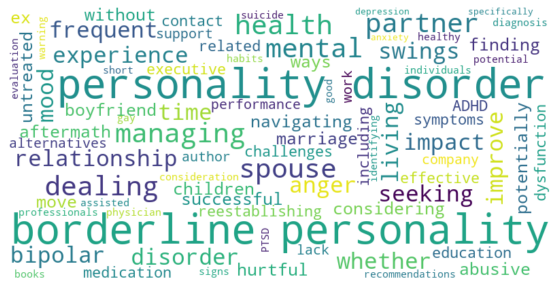

In [71]:
bpd = df[(df['Neurodiversity'] == 'BPD')]
generate_wordcloud_series(bpd, 'bpd',['bpd'])

dict_keys(['individual', 'workplace', 'certification', 'coping', 'strategies', 'harassment', 'need', 'HR', 'intervention', 'use', 'dictation', 'software', 'success', 'ADHD', 'transcriptionists', 'obtaining', 'without', 'pursuing', 'another', 'master', 'degree', 'struggle', 'find', 'job', 'due', 'despite', 'finishing', 'PhD', 'potential', 'benefits', 'action', 'oriented', 'video', 'games', 'reading', 'skills', 'particularly', 'children', 'seeking', 'advice', 'start', 'creating', 'digital', 'online', 'course', 'called', 'Category', 'Minds', 'teaches', 'categorize', 'organize', 'subjects', 'using', 'visual', 'auditory', 'sensory', 'methods', 'based', 'creator', 'experience', 'overcoming', 'question', 'much'])


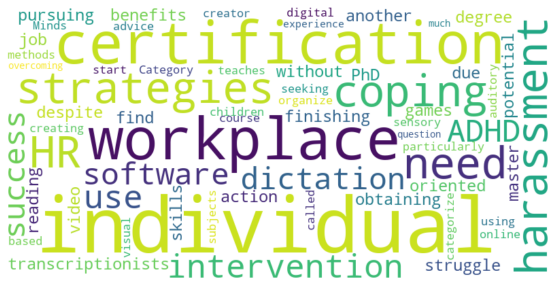

In [72]:
dyslexia = df[(df['Neurodiversity'] == 'Dyslexia')]
generate_wordcloud_series(dyslexia, 'dyslexia',['dyslexia'])

dict_keys(['work', 'struggle', 'seeking', 'ADHD', 'individual', 'anxiety', 'accommodations', 'mental health', 'dealing', 'impact', 'potential', 'due', 'depression', 'whether', 'diagnoses', 'Autism', 'medication', 'someone', 'job', 'medical', 'relationship', 'feeling', 'unsupported', 'partner', 'boss', 'ability', 'focus', 'frustration', 'micromanaging', 'without', 'help', 'managing', 'non', 'low', 'physical', 'disorder', 'joking', 'consequences', 'misuse', 'conditions', 'slurs', 'jokes', 'offense', 'causes', 'considering', 'ending', 'unfulfilled', 'immature', 'new', 'mother', 'returning', 'experiencing', 'postpartum', 'overwhelmed', 'disclose', 'one', 'co', 'worker', 'involuntary', 'repetitive', 'noises', 'writer', 'serious', 'trivialization', 'cute', 'quirky', 'adjective', 'mental', 'health', 'high', 'performing', 'employee', 'specialty', 'claims', 'struggling', 'critical', 'never', 'acknowledges', 'efforts', 'gaslighting', 'environment', 'recommendation', 'doctor', 'treats', 'coping',

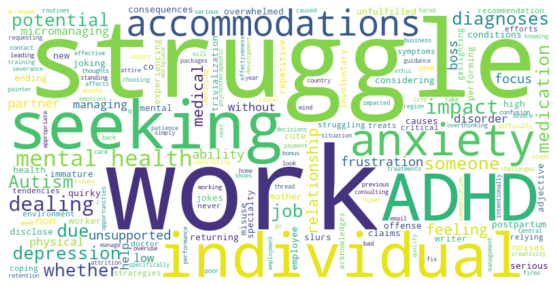

In [73]:
ocd = df[(df['Neurodiversity'] == 'OCD')]
generate_wordcloud_series(ocd, 'ocd',['ocd'])